# Gradient Descent

### imports and packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff

%matplotlib inline

### Example 1 - simple cost function
$f(x) = x^2 + x + 1$

In [3]:
# make data
x1 = np.linspace(start=-3, stop=3, num=100)


In [4]:
# define function
def f(x):
    return x**2 + x + 1


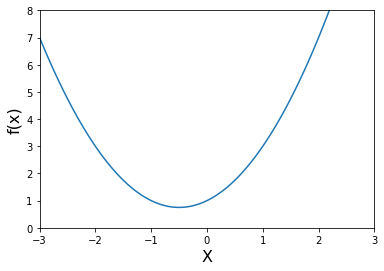

In [5]:
# plot
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X',fontsize = 16)
plt.ylabel('f(x)',fontsize = 16)
plt.plot(x1,f(x1))
plt.show()

slope and derivative

In [6]:
# calculate derivative (slope)
def df(x):
    return 2*x + 1

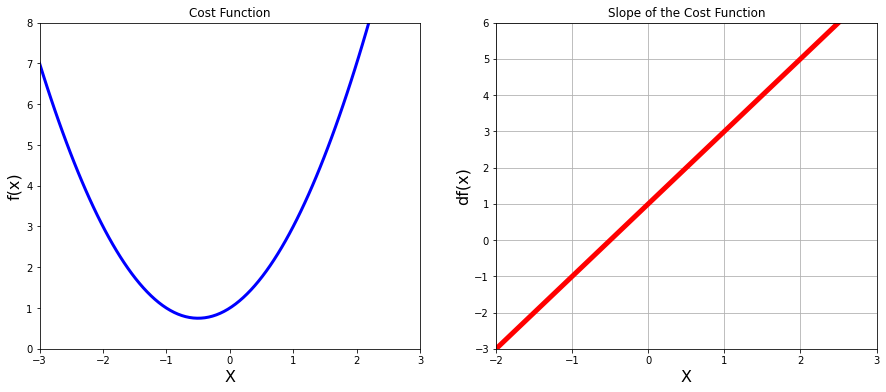

In [7]:
# plot function and dervative side by side
plt.figure(figsize=[15,6])

# chart 1 : cost function
plt.subplot(1,2,1)

plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x1, f(x1), color = "blue", linewidth = 3)

# chart 2 : derivative (slope) of cost function
plt.subplot(1, 2, 2)

plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.grid()
plt.title('Slope of the Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x1, df(x1), color="red", linewidth=5)

plt.show()


### Gradient Descent Algorithm

In [8]:
new_x = 3
previous_x = 0
step_multplier = 0.1  #learning rate

list_x = [new_x]
list_slope = [df(new_x)]

precision = 0.0001

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - gradient * step_multplier

    #add to lists
    list_x.append(new_x)
    list_slope.append(df(new_x))

    #break condition
    step_size = abs(new_x - previous_x)
    if step_size < precision :
        break

print('Local minimum occurs at : ', new_x)
print('Slope or df(x) at this point : ', df(new_x))
print('Cost or f(x) at this point ', f(new_x))




Local minimum occurs at :  -0.49962781616118024
Slope or df(x) at this point :  0.0007443676776395236
Cost or f(x) at this point  0.7500001385208099


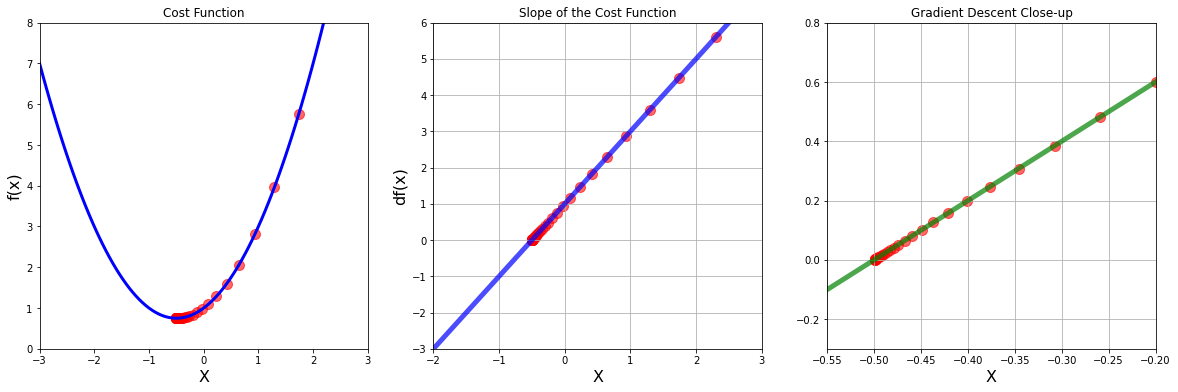

In [9]:
# Superimpose gradent calculations on the plot
plt.figure(figsize=[20,6])

# chart 1 : cost function
plt.subplot(1,3,1)

plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x1, f(x1), color = "blue", linewidth = 3)
values = np.array(list_x)
plt.scatter(list_x, f(values), color = 'red' , s = 100, alpha=0.6)

# chart 2 : derivative (slope) of cost function
plt.subplot(1, 3, 2)

plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.grid()
plt.title('Slope of the Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x1, df(x1), color="blue", linewidth=5, alpha = 0.7)
plt.scatter(list_x, list_slope, color='red', s=100, alpha=0.6)

# chart 3 : closeup of gradient descent
plt.subplot(1,3,3)

plt.xlim(-0.55,-0.2)
plt.ylim(-0.3, 0.8)
plt.grid()
plt.title('Gradient Descent Close-up')
plt.xlabel('X', fontsize=16)
plt.plot(x1, df(x1), color="green", linewidth=5, alpha=0.7)
plt.scatter(list_x, list_slope, color='red', s=100, alpha=0.6)

plt.show()


----

In [10]:
# coding challenge solution

def sing(num_bottles):
    list = []
    for n in range(num_bottles,0,-1):
        list.append(
            '{num} bottles of beer on the wall, {num} bottles of beer.'.format(num=n))
        list.append(
            'Take one down and pass it around,{num} bottles of beer on the wall.'.format(num=n-1))
        list.append('')
    return list

sing(10)

['10 bottles of beer on the wall, 10 bottles of beer.',
 'Take one down and pass it around,9 bottles of beer on the wall.',
 '',
 '9 bottles of beer on the wall, 9 bottles of beer.',
 'Take one down and pass it around,8 bottles of beer on the wall.',
 '',
 '8 bottles of beer on the wall, 8 bottles of beer.',
 'Take one down and pass it around,7 bottles of beer on the wall.',
 '',
 '7 bottles of beer on the wall, 7 bottles of beer.',
 'Take one down and pass it around,6 bottles of beer on the wall.',
 '',
 '6 bottles of beer on the wall, 6 bottles of beer.',
 'Take one down and pass it around,5 bottles of beer on the wall.',
 '',
 '5 bottles of beer on the wall, 5 bottles of beer.',
 'Take one down and pass it around,4 bottles of beer on the wall.',
 '',
 '4 bottles of beer on the wall, 4 bottles of beer.',
 'Take one down and pass it around,3 bottles of beer on the wall.',
 '',
 '3 bottles of beer on the wall, 3 bottles of beer.',
 'Take one down and pass it around,2 bottles of beer on

----------------------------------------------

### Example 2 - Multiple minima vs Initial guess
$g(x) = x^4 - 4x^2 + 5$

In [11]:
# define function
def g(x):
    return x**4 - 4*x**2 + 5

In [12]:
# make data
x2 = np.linspace(-2,2,1000)

In [13]:
# calculate derivative(slope)
def dg(x):
    return 4*x**3 - 8*x

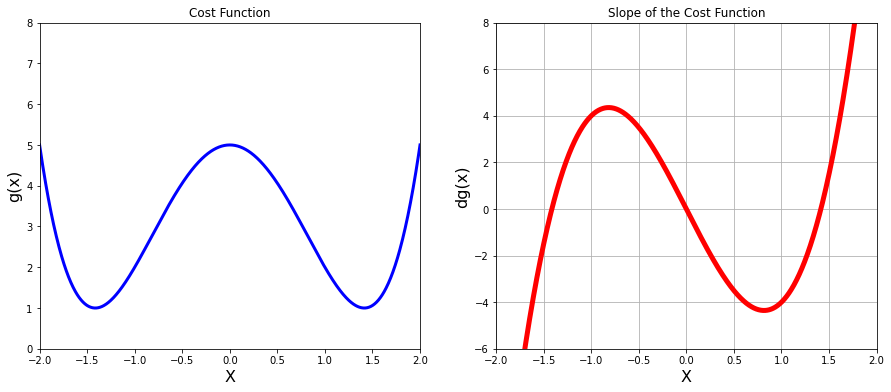

In [14]:
# plot function and dervative side by side
plt.figure(figsize=[15, 6])

# chart 1 : cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0, 8)
plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x2, g(x2), color="blue", linewidth=3)

# chart 2 : derivative (slope) of cost function
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6,8)
plt.grid()
plt.title('Slope of the Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(x2, dg(x2), color="red", linewidth=5)

plt.show()
 

### Gradient Descent as a python function

In [15]:
def gradient_descent(derivative_func, initial_guess, learning_rate = 0.02, precision = 0.001, max_iteration = 300):
    new_x = initial_guess
    list_x = [new_x]
    list_slope = [derivative_func(new_x)]

    for n in range(max_iteration):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - gradient * learning_rate

        #add to lists
        list_x.append(new_x)
        list_slope.append(derivative_func(new_x))

        #break condition
        step_size = abs(new_x - previous_x)
        if step_size < precision:
            break
    return new_x, list_x, list_slope


In [16]:
local_min, x_list, slope_list = gradient_descent(derivative_func = dg, initial_guess = 0.2)

#try different function calls by changing the parameters


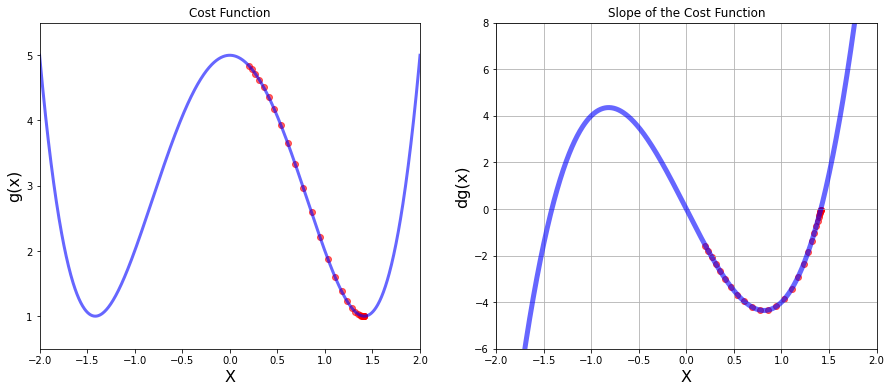

In [17]:
# plot function, dervative and scatter plot side by side
plt.figure(figsize=[15, 6])

# chart 1 : cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x2, g(x2), color="blue", linewidth=3, alpha=0.6)
plt.scatter(x_list, g(np.array(x_list)), color="red", alpha=0.6)

# chart 2 : derivative (slope) of cost function
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.grid()
plt.title('Slope of the Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(x2, dg(x2), color="blue", linewidth=5, alpha = 0.6)
plt.scatter(x_list, slope_list,alpha = 0.6, color = "red")

plt.show()


------

### Example 3 - Divergence, Overflow and Python Tuples
$h(x) = x^5 - 2x^4 + 2$

In [18]:
# make data
x3 = np.linspace(start=-2.5,stop=2.5,num=1000)

In [19]:
# define function 
def h(x):
    return x**5 - 2*x**4 + 2

In [20]:
# calculate derivative (slope)
def dh(x):
    return 5*x**4 - 8*x**3

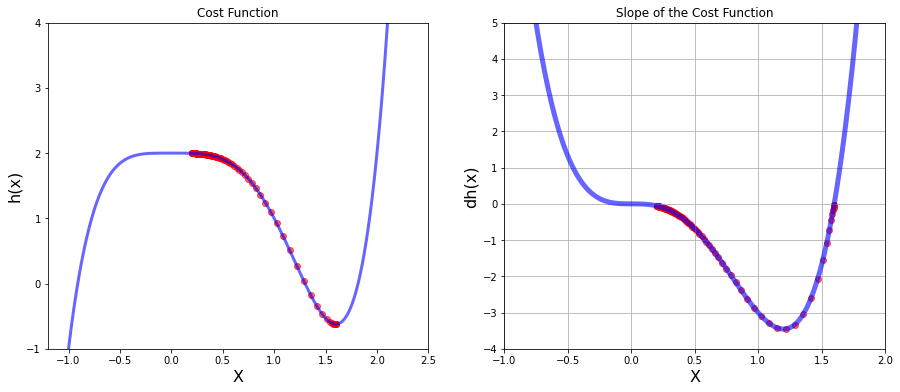

In [21]:
local_min, x_list, slope_list = gradient_descent(derivative_func=dh, initial_guess=0.2)

# plot function, dervative and scatter plot side by side
plt.figure(figsize=[15, 6])

# chart 1 : cost function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)
plt.title('Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.plot(x3, h(x3), color="blue", linewidth=3, alpha=0.6)
plt.scatter(x_list, h(np.array(x_list)), color="red", alpha=0.6)

# chart 2 : derivative (slope) of cost function
plt.subplot(1, 2, 2)

plt.xlim(-1, 2)
plt.ylim(-4, 5)
plt.grid()
plt.title('Slope of the Cost Function')
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.plot(x3, dh(x3), color="blue", linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, alpha=0.6, color="red")

plt.show()



### Learning Rate

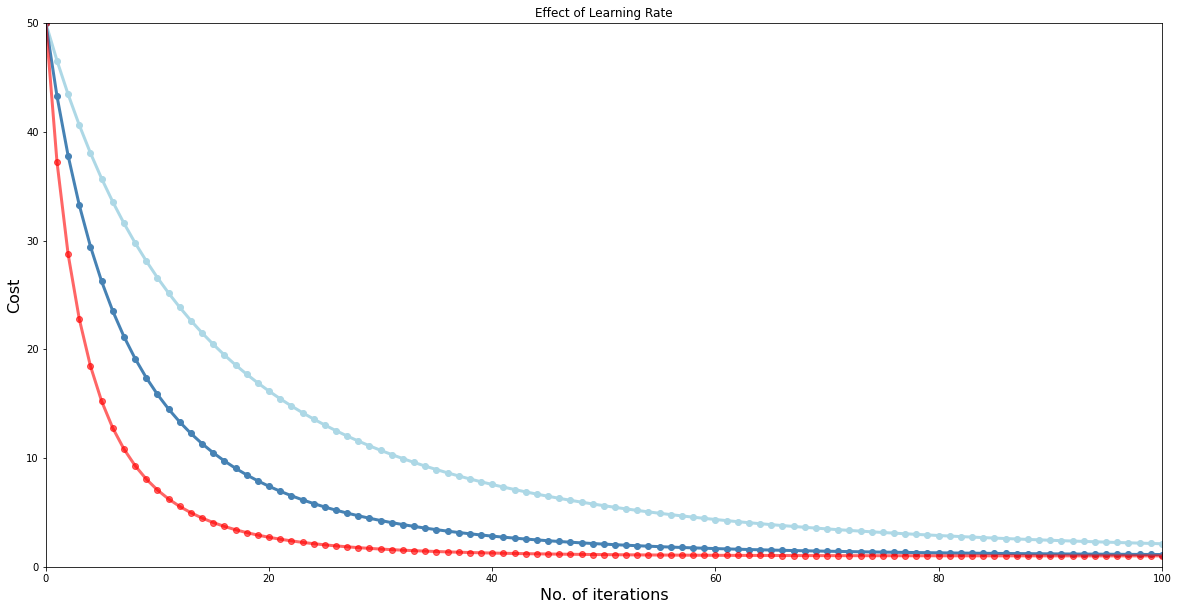

In [22]:
# Run gardient descent 3 times

n = 100
iteration_list = list(range(0,n+1))

low_gamma = gradient_descent(
    derivative_func=dg, initial_guess=3, learning_rate= 0.0005, precision= 0.0001, max_iteration=n )

mid_gamma = gradient_descent(
    derivative_func=dg, initial_guess=3, learning_rate= 0.001, precision= 0.0001, max_iteration=n)

high_gamma = gradient_descent(
    derivative_func=dg, initial_guess=3, learning_rate=0.002, precision=0.0001, max_iteration=n)

# plot function, dervative and scatter plot side by side
plt.figure(figsize=[20, 10])

plt.xlim(0, n)
plt.ylim(0, 50)
plt.title('Effect of Learning Rate')
plt.xlabel('No. of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# values for chart
# x-axis : a list form 0 -> n+1
# y-axis : convert data list from gradient descent function to numpy array

# low learning rate plot
low_values = np.array(low_gamma[1])

plt.plot(iteration_list, g(low_values), color="lightblue", linewidth=3)
plt.scatter(iteration_list, g(low_values), color="lightblue",)

# mid learning rate plot
mid_values = np.array(mid_gamma[1])
plt.plot(iteration_list, g(mid_values), color="steelblue", linewidth=3)
plt.scatter(iteration_list, g(mid_values), color="steelblue",)

# high learning rate plot
high_values = np.array(high_gamma[1])
plt.plot(iteration_list, g(high_values), color="red", linewidth=3, alpha=0.6)
plt.scatter(iteration_list, g(high_values), color="red", alpha=0.6)

plt.show()



### Example 4 - Data Visualization with 3D charts
Minimise $f(x,y) = \frac{1}{3^{-x^2-y^2}+1}$

In [23]:
# define function:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1 / (r+1)

In [24]:
# generate Data
x4 = np.linspace(start=-2, stop = 2, num = 200)
y4 = np.linspace(start=-2, stop = 2, num = 200)

x4, y4 = np.meshgrid(x4, y4)

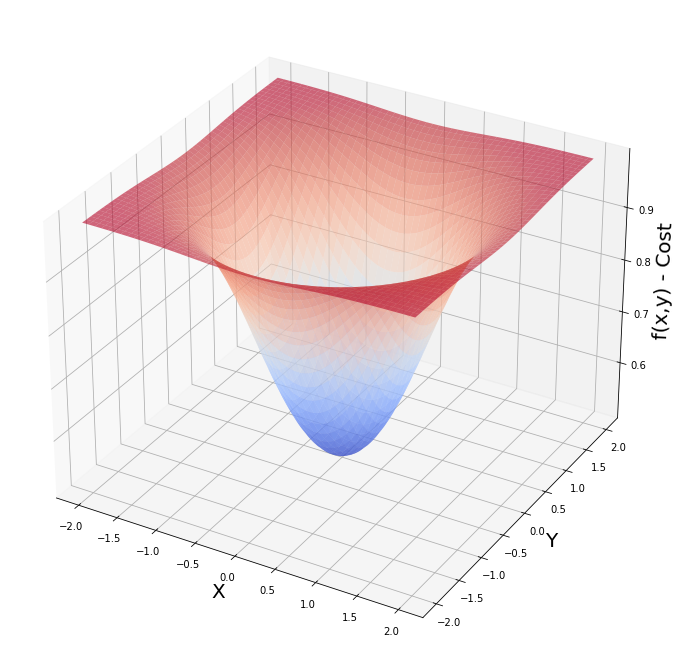

In [25]:
# plot 3D object
fig = plt.figure(figsize=[16, 12])
axes = fig.gca(projection = '3d')

axes.set_xlabel('X', fontsize=20)
axes.set_ylabel('Y', fontsize = 20)
axes.set_zlabel('f(x,y) - Cost', fontsize=20)

axes.plot_surface(x4,y4,f(x4,y4), cmap = cm.coolwarm, alpha = 0.6)

plt.show()


### Partial Derivative and Symbolic Computation

In [31]:
#Assign symbols a,b in place of x and y

a, b = symbols('x,y')
f(a,b)

1/(3**(-x**2 - y**2) + 1)

In [33]:
# Partial Derivative wrt X

print("WRT X : ", diff(f(a, b), a))

# Partial Derivative wrt Y

print("WRT Y : ",diff(f(a,b),b))

WRT X :  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
WRT Y :  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2


In [36]:
# Evaluate a function at some given point (a,b)

f(a,b).evalf(subs={a:1.8, b:1.0})

0.990604794032582

In [39]:
# Finding slope of a function at some given point (a,b) 

# calculating the partial derivtive wrt x

diff(f(a,b),a).evalf(subs = {a:1.8,b:1.0})

0.0368089716197505